# CALIBRATION

In [1179]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

## Opening files

In [1180]:

# Importing Data
x = []
y = []

# Open file in read mode
with open("../251119 Natrium 22 calibratie.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))

# Convert lists to numpy arrays
x_array = np.array(x)
y_array = np.array(y)


## Define ranges of masked / unmasked ranges

In [1181]:
# Define the two unmasked x-ranges
x_min_na1, x_max_na1 = 197, 210
x_min_na2, x_max_na2 = 500, 512

# Create boolean masks for each unmasked range
mask_range_na1 = (x_array >= x_min_na1) & (x_array <= x_max_na1)
mask_range_na2 = (x_array >= x_min_na2) & (x_array <= x_max_na2)

# Combine both unmasked ranges
unmasked_mask = mask_range_na1 | mask_range_na2

# Masked = everything outside both ranges
masked_mask = ~unmasked_mask

# Separate data for plotting/fitting
x_selection_na1 = x_array[mask_range_na1]
y_selection_na1 = y_array[mask_range_na1]

x_selection_na2 = x_array[mask_range_na2]
y_selection_na2 = y_array[mask_range_na2]

x_masked = x_array[masked_mask]
y_masked = y_array[masked_mask]


## Fit to Gaussian funtion

In [1182]:
# Fit Gaussian to first range (Na-22 Peak 1) 
gauss_na1 = models.GaussianModel(prefix='g_na1_')
pars_na1 = gauss_na1.guess(y_selection_na1, x=x_selection_na1)
result_na1 = gauss_na1.fit(y_selection_na1, pars_na1, x=x_selection_na1)

print(x_selection_na1)
print(y_selection_na1)
print(max(y_selection_na1))

# Fit Gaussian to second range (Na-22 Peak 2) 
gauss_na2 = models.GaussianModel(prefix="g_na2_")
pars_na2 = gauss_na2.guess(y_selection_na2, x=x_selection_na2)
result_na2 = gauss_na2.fit(y_selection_na2, pars_na2, x=x_selection_na2)


[198.03921569 201.96078431 205.88235294 209.80392157]
[ 35. 312. 342.  26.]
342.0


## Creating Plot with Gaussian fits

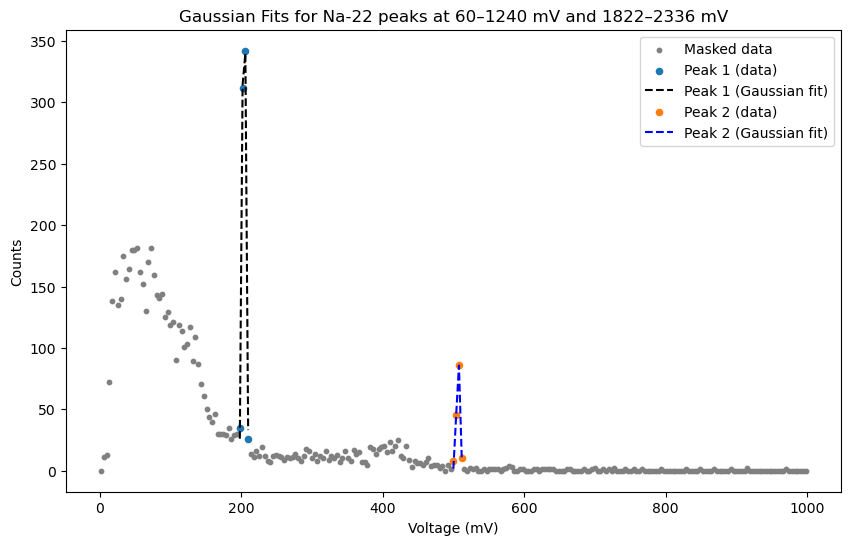

In [1183]:
plt.figure(figsize=(10, 6))

# Masked data (outside both peaks)
plt.scatter(x_masked, y_masked, color="grey", label="Masked data", s=10)

# Unmasked and fitted data for each peak
plt.scatter(x_selection_na1, y_selection_na1, label="Peak 1 (data)", s=20)
plt.plot(x_selection_na1, result_na1.best_fit, "k--", label="Peak 1 (Gaussian fit)")

plt.scatter(x_selection_na2, y_selection_na2, label="Peak 2 (data)", s=20)
plt.plot(x_selection_na2, result_na2.best_fit, "b--", label="Peak 2 (Gaussian fit)")

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Gaussian Fits for Na-22 peaks at 60–1240 mV and 1822–2336 mV")
plt.legend()
plt.show()


## Fit result

In [1184]:
print("\n=== Gaussian Fit 1 (60–1240 mV) ===")
print(result_na1.fit_report())

print("\n=== Gaussian Fit 2 (1822–2336 mV) ===")
print(result_na2.fit_report())



=== Gaussian Fit 1 (60–1240 mV) ===
[[Model]]
    Model(gaussian, prefix='g_na1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 4
    # variables        = 3
    chi-square         = 138.056715
    reduced chi-square = 138.056715
    Akaike info crit   = 20.1654809
    Bayesian info crit = 18.3243640
    R-squared          = 0.99843832
[[Variables]]
    g_na1_amplitude:  2800.64684 +/- 92.0852462 (3.29%) (init = 1858.824)
    g_na1_center:     204.049640 +/- 0.08065473 (0.04%) (init = 205.8824)
    g_na1_sigma:      2.52617254 +/- 0.14710752 (5.82%) (init = 1.960784)
    g_na1_fwhm:       5.94868162 +/- 0.34641174 (5.82%) == '2.3548200*g_na1_sigma'
    g_na1_height:     442.288273 +/- 19.8969347 (4.50%) == '0.3989423*g_na1_amplitude/max(1e-15, g_na1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g_na1_amplitude, g_na1_sigma) = +0.6394
    C(g_na1_center, g_na1_sigma)    = +0.1310

=== Gaussian Fit 2 (1822

Lineaire fit

## Cesium fit and fit results + resolution

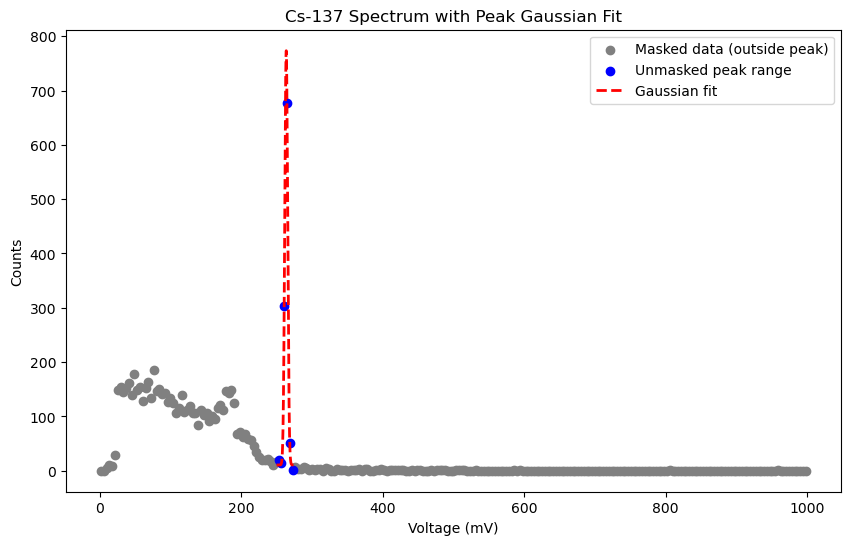

[[Model]]
    (Model(gaussian, prefix='cs_') + Model(constant, prefix='bkg_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 6
    # variables        = 4
    chi-square         = 145.605815
    reduced chi-square = 72.8029076
    Akaike info crit   = 27.1348616
    Bayesian info crit = 26.3018995
    R-squared          = 0.99959988
[[Variables]]
    cs_amplitude:  3937.81834 +/- 85.1730956 (2.16%) (init = 677)
    cs_center:     263.635939 +/- 0.06206928 (0.02%) (init = 264.7059)
    cs_sigma:      2.05953907 +/- 0.07241945 (3.52%) (init = 4)
    bkg_c:         10.5161644 +/- 5.11272170 (48.62%) (init = 2)
    cs_fwhm:       4.84984380 +/- 0.17053476 (3.52%) == '2.3548200*cs_sigma'
    cs_height:     762.773733 +/- 18.8652705 (2.47%) == '0.3989423*cs_amplitude/max(1e-15, cs_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(cs_center, cs_sigma)     = +0.8310
    C(cs_amplitude, bkg_c)     = -0.7312
    C(cs_am

In [1185]:
# Opening File for Cs-137 
cs_voltage = []
cs_counts = []

with open("../251119 Cesium 137 calibratie.csv", "r", newline="") as file:
    next(file)
    for line in file:
        parts = line.split(",")
        cs_voltage.append(float(parts[0]))
        cs_counts.append(float(parts[1]))

cs_voltage_array = np.array(cs_voltage)
cs_counts_array = np.array(cs_counts)

#  Define the unmasked peak range 
cs_peak_min, cs_peak_max = 250, 274
peak_mask = (cs_voltage_array >= cs_peak_min) & (cs_voltage_array <= cs_peak_max)

# Masked = everything outside the peak range
masked_mask = ~peak_mask

# Separate masked/unmasked data
cs_voltage_unmasked = cs_voltage_array[peak_mask]
cs_counts_unmasked = cs_counts_array[peak_mask]

cs_voltage_masked = cs_voltage_array[masked_mask]
cs_counts_masked = cs_counts_array[masked_mask]

# Gaussian + baseline fit for unmasked peak 
gauss_cs = models.GaussianModel(prefix='cs_') + models.ConstantModel(prefix='bkg_')
params = gauss_cs.make_params()
params['cs_center'].set(value=cs_voltage_unmasked[np.argmax(cs_counts_unmasked)])
params['cs_sigma'].set(value=(cs_peak_max - cs_peak_min)/6, min=1)
params['cs_amplitude'].set(value=max(cs_counts_unmasked))
params['bkg_c'].set(value=min(cs_counts_unmasked))
result_cs = gauss_cs.fit(cs_counts_unmasked, params, x=cs_voltage_unmasked)

# Plot full spectrum 
plt.figure(figsize=(10,6))

# Masked points (outside peak range)
plt.scatter(cs_voltage_masked, cs_counts_masked, color='grey', label='Masked data (outside peak)')

# Unmasked peak range
plt.scatter(cs_voltage_unmasked, cs_counts_unmasked, color='blue', label='Unmasked peak range')

# Gaussian fit line
x_fit = np.linspace(cs_peak_min, cs_peak_max, 500)
plt.plot(x_fit, gauss_cs.eval(result_cs.params, x=x_fit), 'r--', linewidth=2, label='Gaussian fit')

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Cs-137 Spectrum with Peak Gaussian Fit")
plt.legend()
plt.show()

# Print fit report 
print(result_cs.fit_report())


## Values for linear fit (literature)

In [1186]:
peak_value_Na1 = 511
peak_value_Na2 = 1274.5
peak_value_Cs = 661

peak_values = [511, 661, 1274.5] # Peak values in keV - literature. 
# Order: sodium 2, cesium, sodium 1

sodium_center_1 = result_na1.params['g_na1_center'].value
sodium_center_2 = result_na2.params['g_na2_center'].value
cesium_center = result_cs.params['cs_center'].value

print(sodium_center_1, sodium_center_2, cesium_center)


centers = [sodium_center_1, cesium_center, sodium_center_2]

sodium_center_2_err = result_na1.params['g_na1_center'].stderr
sodium_center_1_err = result_na2.params['g_na2_center'].stderr
cesium_center_err = result_cs.params['cs_center'].stderr

print(centers)


204.04963977475123 506.8001806325965 263.63593888716605
[204.04963977475123, 263.63593888716605, 506.8001806325965]


## Linear fit

In [1187]:
# create model
mod_linear = models.LinearModel()

y_err = [sodium_center_1_err, cesium_center_err, sodium_center_2_err]

print("Centers:", centers)
print("Errors:", y_err)

# initialize array and calculate weights
y_err_array = np.array(y_err)
y_inv_err = 1 / y_err_array

# use model to fit
fit_result = mod_linear.fit(peak_values, x = centers, weights=y_inv_err)

# print fit report
print(fit_result.fit_report())



Centers: [204.04963977475123, 263.63593888716605, 506.8001806325965]
Errors: [0.26247943834914533, 0.0620692817341873, 0.08065472549870456]
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 1.49479929
    reduced chi-square = 1.49479929
    Akaike info crit   = 1.91013897
    Bayesian info crit = 0.10736355
    R-squared          = 0.99999971
[[Variables]]
    slope:      2.52286896 +/- 4.9813e-04 (0.02%) (init = 1)
    intercept: -4.09755039 +/- 0.18361634 (4.48%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9468


## Calibration graph - plot

Slope (m): 2.522869 ± 0.000498
Intercept (b): -4.097550 ± 0.183616


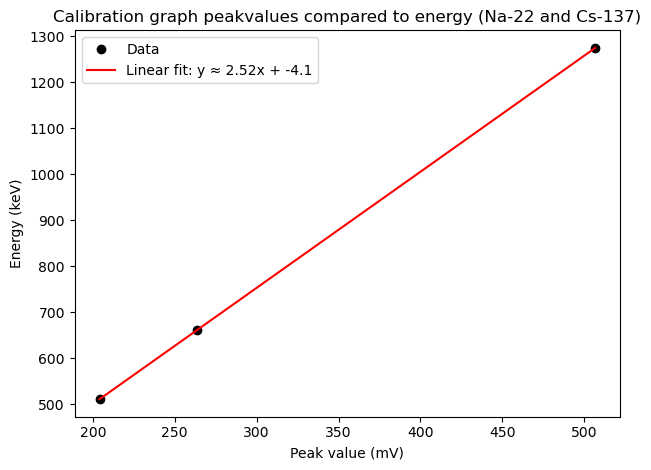

In [1188]:
# Use slope and intercept from lmfit result 
slope = fit_result.params['slope'].value
intercept = fit_result.params['intercept'].value
slope_err = fit_result.params['slope'].stderr
intercept_err = fit_result.params['intercept'].stderr

print(f"Slope (m): {slope:.6f} ± {slope_err:.6f}")
print(f"Intercept (b): {intercept:.6f} ± {intercept_err:.6f}")

# Generate fit line using lmfit slope/intercept
x_fit = np.linspace(min(centers), max(centers), 500)
y_fit = slope * x_fit + intercept

#  Plot 
plt.figure()
plt.plot(centers, peak_values, 'ko', label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Linear fit: y ≈ 2.52x + -4.1')
plt.xlabel("Peak value (mV)")
plt.ylabel("Energy (keV)")
plt.title("Calibration graph peakvalues compared to energy (Na-22 and Cs-137)")
plt.legend()
plt.tight_layout()
plt.savefig("Calibration_graph.png")
plt.show()




## Fit results Linear fit

In [1189]:
# Extract slope and intercept from lmfit result
slope = fit_result.params['slope'].value
intercept = fit_result.params['intercept'].value
slope_err = fit_result.params['slope'].stderr
intercept_err = fit_result.params['intercept'].stderr

print("y = ax + b for a linear fit (from lmfit)")
print(f"a = Slope     = {slope:.6f} ± {slope_err:.6f} keV/mV")
print(f"b = Intercept = {intercept:.6f} ± {intercept_err:.6f} keV")


y = ax + b for a linear fit (from lmfit)
a = Slope     = 2.522869 ± 0.000498 keV/mV
b = Intercept = -4.097550 ± 0.183616 keV


## Resolutions + mean resolution

In [1190]:
#  Resolution Calculation for Cs-137 + Na-22 Peaks 

def compute_resolution(result, prefix):
    """Extract Gaussian parameters and compute FWHM & resolution."""
    center = result.params[f"{prefix}center"].value
    sigma  = result.params[f"{prefix}sigma"].value
    
    FWHM = 2.35482 * sigma
    resolution = FWHM / center
    resolution_pct = resolution * 100
    
    return center, sigma, FWHM, resolution, resolution_pct


#  Cs-137 
c_cs, s_cs, fwhm_cs, res_cs, res_cs_pct = compute_resolution(result_cs, "cs_")

print(" Cs-137 Peak Resolution ")
print(f"Center (mV):       {c_cs:.3f}")
print(f"Sigma:             {s_cs:.3f}")
print(f"FWHM (mV):         {fwhm_cs:.3f}")
print(f"Resolution:        {res_cs:.6f}")
print(f"Resolution (%):    {res_cs_pct:.3f}%\n")


#  Na-22 Peak 1 
c1, s1, fwhm1, res1, res1p = compute_resolution(result_na1, "g_na1_")

print(" Na-22 Peak 1 Resolution ")
print(f"Center (mV):       {c1:.3f}")
print(f"Sigma:             {s1:.3f}")
print(f"FWHM (mV):         {fwhm1:.3f}")
print(f"Resolution:        {res1:.6f}")
print(f"Resolution (%):    {res1p:.3f}%\n")


#  Na-22 Peak 2 
c2, s2, fwhm2, res2, res2p = compute_resolution(result_na2, "g_na2_")

print("Na-22 Peak 2 Resolution ")
print(f"Center (mV):       {c2:.3f}")
print(f"Sigma:             {s2:.3f}")
print(f"FWHM (mV):         {fwhm2:.3f}")
print(f"Resolution:        {res2:.6f}")
print(f"Resolution (%):    {res2p:.3f}%")


#  Mean Resolution 
resolutions = np.array([res_cs, res1, res2])

mean_resolution = np.mean(resolutions)
std_resolution  = np.std(resolutions, ddof=1)       # sample std
sem_resolution  = std_resolution / np.sqrt(len(resolutions))  # standard error of mean

print("\nMean Detector Resolution ")
print(f"Mean Resolution:           {mean_resolution:.6f}")
print(f"Standard Deviation:        {std_resolution:.6f}")
print(f"Standard Error (Error):    {sem_resolution:.6f}")
print(f"Mean Resolution (%):       {mean_resolution*100:.3f} ± {sem_resolution*100:.3f}%")


 Cs-137 Peak Resolution 
Center (mV):       263.636
Sigma:             2.060
FWHM (mV):         4.850
Resolution:        0.018396
Resolution (%):    1.840%

 Na-22 Peak 1 Resolution 
Center (mV):       204.050
Sigma:             2.526
FWHM (mV):         5.949
Resolution:        0.029153
Resolution (%):    2.915%

Na-22 Peak 2 Resolution 
Center (mV):       506.800
Sigma:             2.394
FWHM (mV):         5.637
Resolution:        0.011123
Resolution (%):    1.112%

Mean Detector Resolution 
Mean Resolution:           0.019557
Standard Deviation:        0.009071
Standard Error (Error):    0.005237
Mean Resolution (%):       1.956 ± 0.524%


# Data Analysis

## Opening file

In [1191]:

# Importing Data
x = []
y = []

# Open file in read mode
with open("../251124 mushrooms 3 - 1 hr.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))

# Convert lists to numpy arrays
x_array = np.array(x)
y_array = np.array(y)


## Determining ranges

In [1192]:
# Define the four unmasked x-ranges
x_min1, x_max1 = 195, 209
x_min2, x_max2 = 254, 268
x_min3, x_max3 = 496, 510
x_min4, x_max4 = 568, 583

# Create boolean masks for each unmasked range
mask_range1 = (x_array >= x_min1) & (x_array <= x_max1)
mask_range2 = (x_array >= x_min2) & (x_array <= x_max2)
mask_range3 = (x_array >= x_min3) & (x_array <= x_max3)
mask_range4 = (x_array >= x_min4) & (x_array <= x_max4)

# Combine all unmasked ranges
unmasked_mask = mask_range1 | mask_range2 | mask_range3 | mask_range4

# Masked = everything outside all four ranges
masked_mask = ~unmasked_mask

# Separate data for plotting/fitting
x_selection_1 = x_array[mask_range1]
y_selection_1 = y_array[mask_range1]

x_selection_2 = x_array[mask_range2]
y_selection_2 = y_array[mask_range2]

x_selection_3 = x_array[mask_range3]
y_selection_3 = y_array[mask_range3]

x_selection_4 = x_array[mask_range4]
y_selection_4 = y_array[mask_range4]

# Masked data
x_masked = x_array[masked_mask]
y_masked = y_array[masked_mask]


## Gaussian fits

In [1193]:
#  Fit Gaussian to first range 
gauss1 = models.GaussianModel(prefix='g1_')
pars1 = gauss1.guess(y_selection_1, x=x_selection_1)
result1 = gauss1.fit(y_selection_1, pars1, x=x_selection_1)

print(x_selection_1)
print(y_selection_1)
print(max(y_selection_1))

# Fit Gaussian to second range 
gauss2 = models.GaussianModel(prefix='g2_')
pars2 = gauss2.guess(y_selection_2, x=x_selection_2)
result2 = gauss2.fit(y_selection_2, pars2, x=x_selection_2)

# Fit Gaussian to third range 
gauss3 = models.GaussianModel(prefix='g3_')
pars3 = gauss3.guess(y_selection_3, x=x_selection_3)
result3 = gauss3.fit(y_selection_3, pars3, x=x_selection_3)

# Fit Gaussian to fourth range 
gauss4 = models.GaussianModel(prefix='g4_')
pars4 = gauss4.guess(y_selection_4, x=x_selection_4)
result4 = gauss4.fit(y_selection_4, pars4, x=x_selection_4)

[195.08196721 198.36065574 201.63934426 204.91803279 208.19672131]
[135. 143. 332. 303. 129.]
332.0


## PLOTS

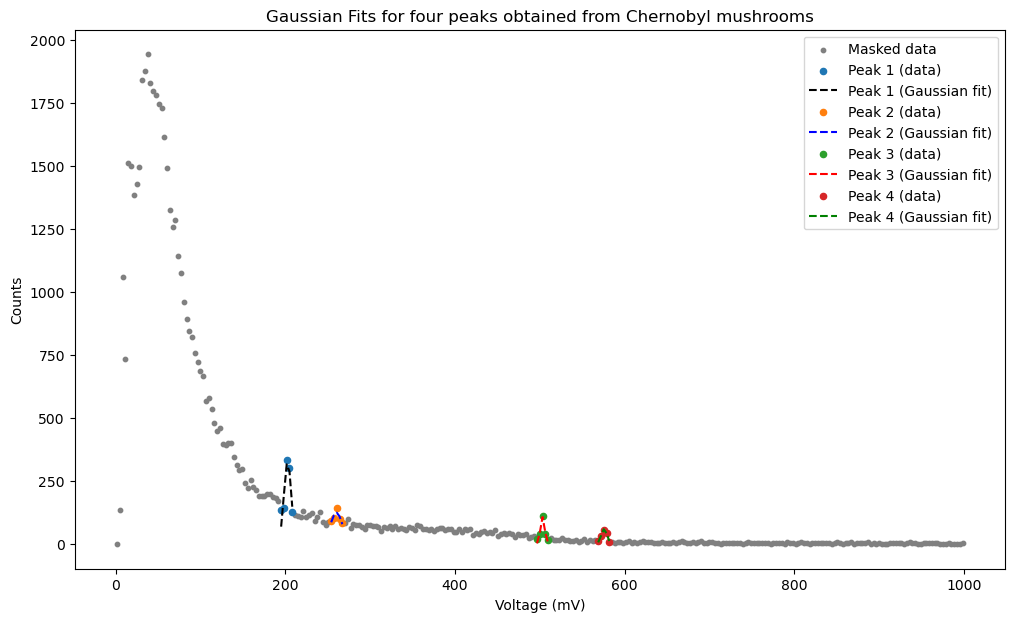

In [1194]:
plt.figure(figsize=(12, 7))

# Masked data (everything outside the 4 peak ranges)
plt.scatter(x_masked, y_masked, color="grey", label="Masked data", s=10)

# Peak 1 
plt.scatter(x_selection_1, y_selection_1, label="Peak 1 (data)", s=20)
plt.plot(x_selection_1, result1.best_fit, "k--", label="Peak 1 (Gaussian fit)")

# Peak 2 
plt.scatter(x_selection_2, y_selection_2, label="Peak 2 (data)", s=20)
plt.plot(x_selection_2, result2.best_fit, "b--", label="Peak 2 (Gaussian fit)")

# Peak 3 
plt.scatter(x_selection_3, y_selection_3, label="Peak 3 (data)", s=20)
plt.plot(x_selection_3, result3.best_fit, "r--", label="Peak 3 (Gaussian fit)")

# Peak 4 
plt.scatter(x_selection_4, y_selection_4, label="Peak 4 (data)", s=20)
plt.plot(x_selection_4, result4.best_fit, "g--", label="Peak 4 (Gaussian fit)")

# Labels, title, legend
plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Gaussian Fits for four peaks obtained from Chernobyl mushrooms")
plt.legend()
plt.savefig("plot_peaks.png")
plt.show()



## Fit results

In [1195]:
print("\nGaussian Fit 1 (Range 1)")
print(result1.fit_report())

print("\nGaussian Fit 2 (Range 2)")
print(result2.fit_report())

print("\nGaussian Fit 3 (Range 3)")
print(result3.fit_report())

print("\nGaussian Fit 4 (Range 4)")
print(result4.fit_report())



Gaussian Fit 1 (Range 1)
[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 5
    # variables        = 3
    chi-square         = 8055.30532
    reduced chi-square = 4027.65266
    Akaike info crit   = 42.9232414
    Bayesian info crit = 41.7515552
    R-squared          = 0.79959534
[[Variables]]
    g1_amplitude:  3566.59897 +/- 605.163317 (16.97%) (init = 1331.148)
    g1_center:     202.734302 +/- 0.81496721 (0.40%) (init = 201.6393)
    g1_sigma:      4.35285392 +/- 0.91528660 (21.03%) (init = 2.185792)
    g1_fwhm:       10.2501875 +/- 2.15533520 (21.03%) == '2.3548200*g1_sigma'
    g1_height:     326.881449 +/- 52.4519363 (16.05%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_amplitude, g1_sigma) = +0.6623
    C(g1_center, g1_sigma)    = +0.1124

Gaussian Fit 2 (Range 2)
[[Model]]
    Model(gaussian, prefix='g2_')
[

## Plug into calibration relation

In [1196]:
# Extract Gaussian centers from each fit
center1 = result1.params['g1_center'].value
center2 = result2.params['g2_center'].value
center3 = result3.params['g3_center'].value
center4 = result4.params['g4_center'].value

# Put all centers into xaxis
xaxis = [center1, center2, center3, center4]

print("Gaussian centers (x-axis values):", xaxis)

# Extract slope, intercept, and their errors
slope = fit_result.params['slope'].value
intercept = fit_result.params['intercept'].value
slope_err = fit_result.params['slope'].stderr
intercept_err = fit_result.params['intercept'].stderr

print("\ny = ax + b for a linear fit")
print(f"a = Slope = {slope:.6f} ± {slope_err:.6f}")
print(f"b = Intercept = {intercept:.6f} ± {intercept_err:.6f}")

# Compute energy values for each center
energy_values = [slope * x + intercept for x in xaxis]

print("\nY-values for each peak:")
for i, (x, y) in enumerate(zip(xaxis, energy_values), start=1):
    print(f"  Center {i}: x = {x:.6f} mV, y = {y:.6f} keV")


Gaussian centers (x-axis values): [202.73430183296202, 260.2905313376183, 503.31008154709036, 575.9049208213175]

y = ax + b for a linear fit
a = Slope = 2.522869 ± 0.000498
b = Intercept = -4.097550 ± 0.183616

Y-values for each peak:
  Center 1: x = 202.734302 mV, y = 507.374527 keV
  Center 2: x = 260.290531 mV, y = 652.581352 keV
  Center 3: x = 503.310082 mV, y = 1265.687833 keV
  Center 4: x = 575.904921 mV, y = 1448.835100 keV


## Uncertainties, Error propagation

In [1197]:
x_err1 = result1.params['g1_center'].stderr
x_err2 = result2.params['g2_center'].stderr
x_err3 = result3.params['g3_center'].stderr
x_err4 = result4.params['g4_center'].stderr

x_errors = [x_err1, x_err2, x_err3, x_err4]

y_errors = []
for x, dx in zip(xaxis, x_errors):
    dE = (x * slope_err)**2 + (slope * dx)**2 + (intercept_err)**2
    y_errors.append(dE**0.5)   # sqrt

print(x_errors, y_errors)

[0.8149672115280443, 1.0169825137200705, 0.49432761448772816, 0.2591637945865469] [2.0667069273878527, 2.5755411832157127, 1.2852583772476096, 0.7372333633578271]


## Plot

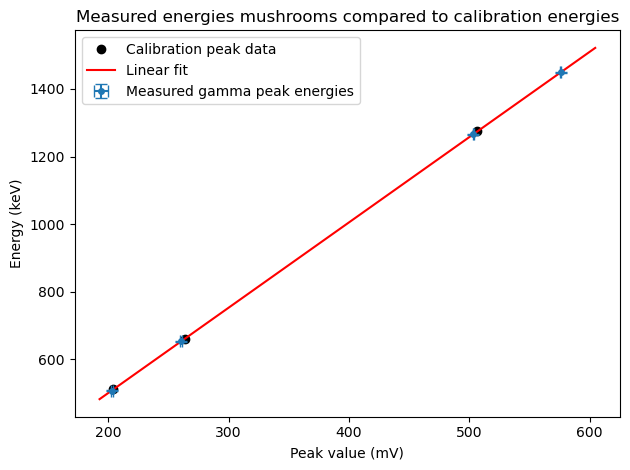

In [1198]:
# Predicted y-values for all Gaussian centers 
xaxis = [center1, center2, center3, center4]
predicted_y = [slope * x + intercept for x in xaxis]

# Generate extended fit line 
x_min = min(min(centers), min(xaxis)) * 0.95
x_max = max(max(centers), max(xaxis)) * 1.05
x_fit = np.linspace(x_min, x_max, 500)
y_fit = slope * x_fit + intercept

# Plot 
plt.figure()
plt.plot(centers, peak_values, 'ko', label='Calibration peak data')             
plt.plot(x_fit, y_fit, 'r-', label='Linear fit')                    

# Measured gamma peaks with error bars
plt.errorbar(
    xaxis, predicted_y,
    xerr=x_errors,
    yerr=y_errors,
    fmt='o',      # blue squares as markers
    capsize=4,
    markersize=4,
    label='Measured gamma peak energies'
)

plt.xlabel("Peak value (mV)")
plt.ylabel("Energy (keV)")
plt.title("Measured energies mushrooms compared to calibration energies")
plt.legend()
plt.tight_layout()
plt.savefig("Calibration_graph.png")
plt.show()


## Resolution (+mean)

In [1199]:
# Resolution Calculation for Mushroom spectrum 

def compute_resolution(result, prefix):
    """Extract Gaussian parameters and compute FWHM & resolution."""
    center = result.params[f"{prefix}center"].value
    sigma  = result.params[f"{prefix}sigma"].value
    
    FWHM = 2.35482 * sigma
    resolution = FWHM / center
    resolution_pct = resolution * 100
    
    return center, sigma, FWHM, resolution, resolution_pct



#Known Peaks (3)

# Cs-137
c_cs, s_cs, fwhm_cs, res_cs, res_cs_pct = compute_resolution(result_cs, "cs_")

print("Cs-137 Peak Resolution")
print(f"Center (mV):       {c_cs:.3f}")
print(f"Sigma:             {s_cs:.3f}")
print(f"FWHM (mV):         {fwhm_cs:.3f}")
print(f"Resolution:        {res_cs:.6f}")
print(f"Resolution (%):    {res_cs_pct:.3f}%\n")


# Na-22 Peak 1
c_na1, s_na1, fwhm_na1, res_na1, res_na1p = compute_resolution(result_na1, "g_na1_")

print("Na-22 Peak 1 Resolution")
print(f"Center (mV):       {c_na1:.3f}")
print(f"Sigma:             {s_na1:.3f}")
print(f"FWHM (mV):         {fwhm_na1:.3f}")
print(f"Resolution:        {res_na1:.6f}")
print(f"Resolution (%):    {res_na1p:.3f}%\n")


#Na-22 Peak 2
c_na2, s_na2, fwhm_na2, res_na2, res_na2p = compute_resolution(result_na2, "g_na2_")

print("Na-22 Peak 2 Resolution")
print(f"Center (mV):       {c_na2:.3f}")
print(f"Sigma:             {s_na2:.3f}")
print(f"FWHM (mV):         {fwhm_na2:.3f}")
print(f"Resolution:        {res_na2:.6f}")
print(f"Resolution (%):    {res_na2p:.3f}%\n")



# Mystery Peaks (4)


# Mystery Peak 1 
m1_c, m1_s, m1_f, m1_r, m1_rp = compute_resolution(result1, "g1_")

print("Mystery Peak 1 Resolution")
print(f"Center (mV):       {m1_c:.3f}")
print(f"Sigma:             {m1_s:.3f}")
print(f"FWHM (mV):         {m1_f:.3f}")
print(f"Resolution:        {m1_r:.6f}")
print(f"Resolution (%):    {m1_rp:.3f}%\n")


# Mystery Peak 2
m2_c, m2_s, m2_f, m2_r, m2_rp = compute_resolution(result2, "g2_")

print("Mystery Peak 2 Resolution")
print(f"Center (mV):       {m2_c:.3f}")
print(f"Sigma:             {m2_s:.3f}")
print(f"FWHM (mV):         {m2_f:.3f}")
print(f"Resolution:        {m2_r:.6f}")
print(f"Resolution (%):    {m2_rp:.3f}%\n")


# Mystery Peak 3 
m3_c, m3_s, m3_f, m3_r, m3_rp = compute_resolution(result3, "g3_")

print("Mystery Peak 3 Resolution")
print(f"Center (mV):       {m3_c:.3f}")
print(f"Sigma:             {m3_s:.3f}")
print(f"FWHM (mV):         {m3_f:.3f}")
print(f"Resolution:        {m3_r:.6f}")
print(f"Resolution (%):    {m3_rp:.3f}%\n")


# Mystery Peak 4 
m4_c, m4_s, m4_f, m4_r, m4_rp = compute_resolution(result4, "g4_")

print("Mystery Peak 4 Resolution")
print(f"Center (mV):       {m4_c:.3f}")
print(f"Sigma:             {m4_s:.3f}")
print(f"FWHM (mV):         {m4_f:.3f}")
print(f"Resolution:        {m4_r:.6f}")
print(f"Resolution (%):    {m4_rp:.3f}%\n")



# Mean Resolution (all 7)

resolutions = np.array([
    res_cs,      # Cs-137
    res_na1,     # Na-22 peak 1
    res_na2,     # Na-22 peak 2
    m1_r, m2_r, m3_r, m4_r  # four unknown peaks
])

mean_resolution = np.mean(resolutions)
std_resolution  = np.std(resolutions, ddof=1)
sem_resolution  = std_resolution / np.sqrt(len(resolutions))

print("Mean Detector Resolution (3 known + 4 unknown)")
print(f"Mean Resolution:           {mean_resolution:.6f}")
print(f"Standard Deviation:        {std_resolution:.6f}")
print(f"Standard Error (Error):    {sem_resolution:.6f}")
print(f"Mean Resolution (%):       {mean_resolution*100:.3f} ± {sem_resolution*100:.3f}%")

Cs-137 Peak Resolution
Center (mV):       263.636
Sigma:             2.060
FWHM (mV):         4.850
Resolution:        0.018396
Resolution (%):    1.840%

Na-22 Peak 1 Resolution
Center (mV):       204.050
Sigma:             2.526
FWHM (mV):         5.949
Resolution:        0.029153
Resolution (%):    2.915%

Na-22 Peak 2 Resolution
Center (mV):       506.800
Sigma:             2.394
FWHM (mV):         5.637
Resolution:        0.011123
Resolution (%):    1.112%

Mystery Peak 1 Resolution
Center (mV):       202.734
Sigma:             4.353
FWHM (mV):         10.250
Resolution:        0.050560
Resolution (%):    5.056%

Mystery Peak 2 Resolution
Center (mV):       260.291
Sigma:             7.264
FWHM (mV):         17.106
Resolution:        0.065717
Resolution (%):    6.572%

Mystery Peak 3 Resolution
Center (mV):       503.310
Sigma:             2.508
FWHM (mV):         5.906
Resolution:        0.011735
Resolution (%):    1.173%

Mystery Peak 4 Resolution
Center (mV):       575.905
Sigm

## Peak finder lists

In [1200]:
# Importing Data from Oussama's csv file
nuclei = []
literature_energies = []
half_lives = []

# Open file in read mode
with open("../Nucleides_Energies_Halflife.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        nuclei.append(str(line_splitted[0]))
        literature_energies.append(float(line_splitted[1]))
        half_lives.append(str(line_splitted[2]))



## Peak finder

In [1201]:
# Measured peak energies from predicted y-values (keV)
measured_energies = energy_values  # replace with your calculated energies

# --- FIX: Replace " a" with " yr" in the half-life list ---
half_lives = [
    hl.strip()
      .replace("\xa0", "")
      .replace("\u200b", "")
      .replace("½", "1/2")
      .replace(" a", " yr")
    for hl in half_lives
]

# Compare measured energies to known gamma energies and find 10 closest isotopes
for i, energy in enumerate(measured_energies, start=1):
    differences = [abs(energy - ke) for ke in literature_energies]
    sorted_indices = sorted(range(len(differences)), key=lambda k: differences[k])

    print(f"Peak {i}: Measured Energy = {energy:.2f} keV --> Closest isotopes:")

    for idx in sorted_indices[:10]:
        print(
            f"  {nuclei[idx]} "
            f"({literature_energies[idx]} keV), "
            f"ΔE = {differences[idx]:.2f} keV, "
            f"half-life = {half_lives[idx]}"
        )

    print()


Peak 1: Measured Energy = 507.37 keV --> Closest isotopes:
  Pa-234 (506.75 keV), ΔE = 0.62 keV, half-life = 6.70 (5) h
  I-133 (510.53 keV), ΔE = 3.16 keV, half-life = 20.87 (8) h
  Tl-208 (510.74 keV), ΔE = 3.37 keV, half-life = 3.058 (6) min
  C-11 (511.0 keV), ΔE = 3.63 keV, half-life = 20.361 (23) min
  N-13 (511.0 keV), ΔE = 3.63 keV, half-life = 9.9670 (37) min
  O-15 (511.0 keV), ΔE = 3.63 keV, half-life = 2.041 (6) min
  F-18 (511.0 keV), ΔE = 3.63 keV, half-life = 1.8288 (3) h
  Na-22 (511.0 keV), ΔE = 3.63 keV, half-life = 2.6029 (8) yr
  Al-26 (511.0 keV), ΔE = 3.63 keV, half-life = 717 (24) 103 yr
  Sc-44 (511.0 keV), ΔE = 3.63 keV, half-life = 3.97 (4) h

Peak 2: Measured Energy = 652.58 keV --> Closest isotopes:
  Hg-206 (649.42 keV), ΔE = 3.16 keV, half-life = 8.32 (7) min
  Sb-126 (656.3 keV), ΔE = 3.72 keV, half-life = 12.35 (6) d
  Ag-110 (657.76 keV), ΔE = 5.18 keV, half-life = 24.56 (11) s
  Ag-110m (657.76 keV), ΔE = 5.18 keV, half-life = 249.78 (2) d
  Sb-124 (64

## Table for peakfinder

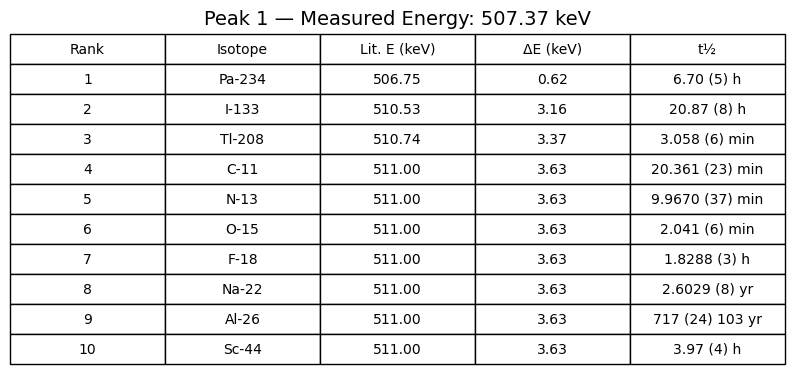

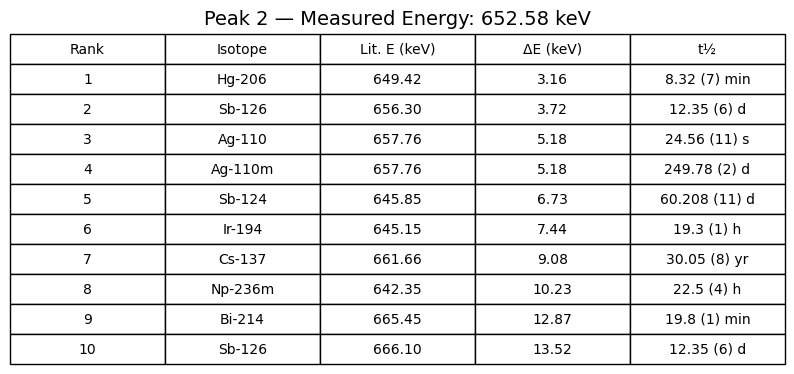

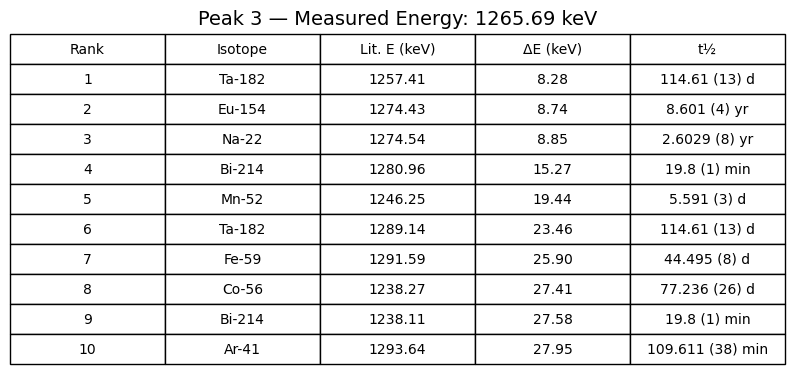

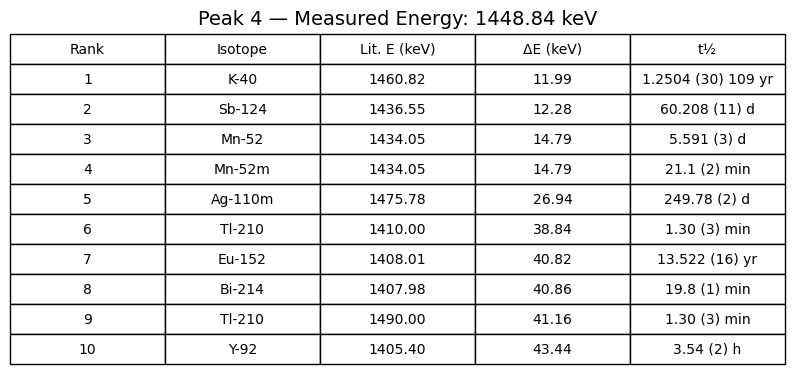

In [1202]:
import pandas as pd
import matplotlib.pyplot as plt

for i, energy in enumerate(measured_energies, start=1):

    # Build rows for this single peak
    rows = []

    differences = [abs(energy - ke) for ke in literature_energies]
    sorted_indices = sorted(range(len(differences)), key=lambda k: differences[k])

    for rank, idx in enumerate(sorted_indices[:10], start=1):
        rows.append({
            "Rank": rank,
            "Isotope": nuclei[idx],
            "Lit. E (keV)": f"{literature_energies[idx]:.2f}",
            "ΔE (keV)": f"{differences[idx]:.2f}",
            "t½": half_lives[idx]
        })

    df = pd.DataFrame(rows)

    # ---- Make a separate table for each peak ----
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_title(f"Peak {i} — Measured Energy: {energy:.2f} keV", fontsize=14, pad=15)
    ax.axis("off")

    tbl = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center"
    )

    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1, 1.8)  # adjust row height

    plt.show()


## Activity using raw csv files

In [1203]:

def read_csv_style(filename):
    x = []
    y = []

    with open(filename, "r", newline="") as file:
        next(file)  # header overslaan

        for line in file:
            line_splitted = line.split(",")
            x.append(float(line_splitted[0]))
            y.append(float(line_splitted[1]))

    return np.array(x), np.array(y)


# Files inlezen
x_source, y_source = read_csv_style("../251124 mushrooms 3 - 1 hr.csv")
x_bg, y_bg = read_csv_style("../251202 background - 2 min.csv")

# Meetduren (niet in CSV)
t_source = 3600   # 1 uur meting
t_bg = 120      # 2 min meting

# Counts Per Second (cps) berekenen
cps_source = np.sum(y_source) / t_source
cps_bg = np.sum(y_bg) / t_bg

# Netto activiteit
net_cps = cps_source - cps_bg

# Resultaten 
print("Total source counts:", np.sum(y_source))
print("Total background counts:", np.sum(y_bg))
print("CPS source:", cps_source)
print("CPS background:", cps_bg)
print("Net CPS (activiteit):", net_cps)


Total source counts: 56078.0
Total background counts: 2196.0
CPS source: 15.577222222222222
CPS background: 18.3
Net CPS (activiteit): -2.722777777777779


## Activity using only peak ranges.

In [1204]:
import numpy as np

def read_csv_style(filename):
    x = []
    y = []

    with open(filename, "r", newline="") as file:
        next(file)  # header overslaan
        for line in file:
            a, b = line.strip().split(",")
            x.append(int(float(a)))   # kanaalnummer
            y.append(float(b))        # counts
    return np.array(x), np.array(y)


def count_in_channel_range(x, y, ch_min, ch_max):
    """
    Filtert puur op X-kolom:
    Neem alle y waarvan x tussen [ch_min, ch_max] ligt.
    """
    mask = (x >= ch_min) & (x <= ch_max)
    return np.sum(y[mask])

x_source, y_source = read_csv_style("../251124 mushrooms 3 - 1 hr.csv")
x_bg,     y_bg     = read_csv_style("../251202 background - 2 min.csv")

t_source = 3600
t_bg = 120

ranges = [
    (195, 209),
    (254, 268),
    (496, 510),
    (568, 583)
]

print("Channel-based Peak Count Analyse")

total_net = 0
total_cps = 0

for i, (ch_min, ch_max) in enumerate(ranges, start=1):

    # Tel counts gebaseerd op X-filter
    src = count_in_channel_range(x_source, y_source, ch_min, ch_max)
    bg  = count_in_channel_range(x_bg,     y_bg,     ch_min, ch_max)

    # Schaal achtergrond
    bg_scaled = bg * (t_source / t_bg)

    net = src - bg_scaled
    cps = net / t_source

    print(f"Piek {i}: channels {ch_min}-{ch_max}")
    print(f"  Source counts:     {src:.1f}")
    print(f"  Background scaled: {bg_scaled:.1f}")
    print(f"  Netto counts:      {net:.2f}")
    print(f"  Netto CPS:         {cps:.5f}\n")

    total_net += net
    total_cps += cps

print("TOTAAL netto counts:", total_net)
print("TOTAAL netto CPS:   ", total_cps)


Channel-based Peak Count Analyse
Piek 1: channels 195-209
  Source counts:     1042.0
  Background scaled: 720.0
  Netto counts:      322.00
  Netto CPS:         0.08944

Piek 2: channels 254-268
  Source counts:     518.0
  Background scaled: 390.0
  Netto counts:      128.00
  Netto CPS:         0.03556

Piek 3: channels 496-510
  Source counts:     232.0
  Background scaled: 90.0
  Netto counts:      142.00
  Netto CPS:         0.03944

Piek 4: channels 568-583
  Source counts:     156.0
  Background scaled: 240.0
  Netto counts:      -84.00
  Netto CPS:         -0.02333

TOTAAL netto counts: 508.0
TOTAAL netto CPS:    0.1411111111111111


## Table for Activity

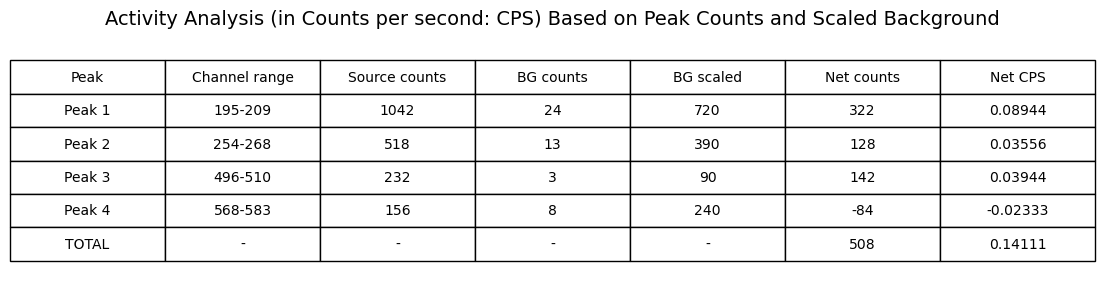

In [1205]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv_style(filename):
    x = []
    y = []
    with open(filename, "r", newline="") as file:
        next(file)
        for line in file:
            a, b = line.strip().split(",")
            x.append(int(float(a)))
            y.append(float(b))
    return np.array(x), np.array(y)

def count_in_channel_range(x, y, ch_min, ch_max):
    mask = (x >= ch_min) & (x <= ch_max)
    return np.sum(y[mask])

x_source, y_source = read_csv_style("../251124 mushrooms 3 - 1 hr.csv")
x_bg, y_bg = read_csv_style("../251202 background - 2 min.csv")

t_source = 3600
t_bg = 120

ranges = [
    (195, 209),
    (254, 268),
    (496, 510),
    (568, 583)
]

rows = []
total_net = 0
total_cps = 0

for i, (ch_min, ch_max) in enumerate(ranges, start=1):
    src = count_in_channel_range(x_source, y_source, ch_min, ch_max)
    bg = count_in_channel_range(x_bg, y_bg, ch_min, ch_max)
    bg_scaled = bg * (t_source / t_bg)
    net = src - bg_scaled
    cps = net / t_source

    total_net += net
    total_cps += cps

    rows.append([
        f"Peak {i}",
        f"{ch_min}-{ch_max}",
        f"{int(src)}",
        f"{int(bg)}",
        f"{int(bg_scaled)}",
        f"{int(net)}",
        f"{cps:.5f}"
    ])

rows.append([
    "TOTAL", "-", "-", "-", "-", f"{int(total_net)}", f"{total_cps:.5f}"
])

columns = ["Peak", "Channel range", "Source counts", "BG counts", "BG scaled", "Net counts", "Net CPS"]

fig, ax = plt.subplots(figsize=(14, 3))
ax.set_title("Activity Analysis (in Counts per second: CPS) Based on Peak Counts and Scaled Background", fontsize=14, pad=15)
ax.axis("off")

tbl = ax.table(
    cellText=rows,
    colLabels=columns,
    cellLoc="center",
    loc="center"
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 2)

plt.show()
